# Encodage 
Transformer les variables discrètes ,continues ou qualitatives en variable quantitative.
### Label encoder

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
## Label encoder pour l'encodage de la valeur y cad des targets

In [2]:
X = np.array(['chien',
             'chat',
             'mouton',
             'oiseau',
             'chien'])

encodage = LabelEncoder()
encodage.fit_transform(X)

array([1, 0, 2, 3, 1])

In [3]:
## inverse transformer pour decoder
encodage.inverse_transform(np.array([0,1,2,3]))

array(['chat', 'chien', 'mouton', 'oiseau'], dtype='<U6')

### Ordinal Encoder

In [4]:
from sklearn.preprocessing import OrdinalEncoder
## Tout comme le label encoder mais permet à l'inverse permet l'encodage des variables X cad des features

In [5]:
X = np.array([['chat','chien'],
             ['chien','mouton'],
             ['mouton','oiseau'],
             ['oiseau','chat']])

encodageO = OrdinalEncoder()
encodageO.fit_transform(X)
## Mais attention l'encodage ordinaire revient à dire que les transformations faites sont d'un point
## de vue arithmetique > = ou < , ceci risque donc de penaliser le modèle à developper

array([[0., 1.],
       [1., 2.],
       [2., 3.],
       [3., 0.]])

### Encodage OneHot
#### pour résoudre le problème d'arithmétisation de l'ordinal encoder
### LabelBinarizer

In [6]:
from sklearn.preprocessing import LabelBinarizer

In [7]:
X = np.array(['chien',
             'chat',
             'mouton',
             'oiseau',
             'chien'])
encodageB = LabelBinarizer(sparse_output=True)
encodageB.fit_transform(X)

<5x4 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

### One-Hot Encoder

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
X = np.array([['chat','chien'],
             ['chien','mouton'],
             ['mouton','oiseau'],
             ['oiseau','chat']])
encodageO = OneHotEncoder()
encodageO.fit_transform(X)

<4x8 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

#  Normalisation
### On encode nos valeurs qualitatives , on normalise nos valeurs quantitatives
### MinMaxScaller ,  StandardScaller
#### la normation MinMax transforme chacque variable de telle sorte qu'elle soit comprise entre 0 et 1 et la standardisation,elle standardise chacque variable X : la moy est nulle et l'ecart type  = 1

In [10]:
## Cependant ces deux normalisations sont très très inefficace lorsqu'il y a la présence d'ouliers
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

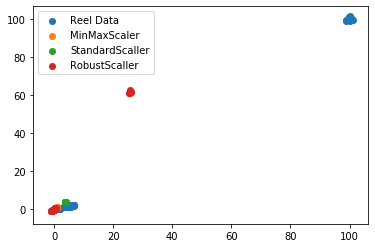

In [11]:

iris = load_iris()
x = iris.data
y = iris.target
outliers = np.full((10,4),100) + np.random.randn(10,4)
x = np.vstack((x,outliers))
sstest = StandardScaler().fit_transform(x)
mmstest = MinMaxScaler().fit_transform(x)
rstest = RobustScaler().fit_transform(x)
plt.scatter(x[:,2],x[:,3],label='Reel Data')
plt.scatter(mmstest[:,2],mmstest[:,3],label='MinMaxScaler')
plt.scatter(sstest[:,2],sstest[:,3],label='StandardScaller')
plt.scatter(rstest[:,2], rstest[:,3],label='RobustScaller')
plt.legend()
plt.show()

## RobustScaller

In [12]:
##  Pour remedier à l'innéficacité du MinMax et du StandardScaller à la présence des outliers 

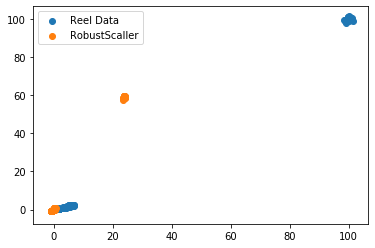

In [13]:
outliers = np.full((10,4),100) + np.random.randn(10,4)
x = np.vstack((x,outliers))
rstest = RobustScaler().fit_transform(x)
plt.scatter(x[:,2],x[:,3],label='Reel Data')
plt.scatter(rstest[:,2], rstest[:,3],label='RobustScaller')
plt.legend()

## Autres transformers de Preprocessing
### Polyfeatures : crée de nouvelles variables polynomiales à partir des variables existantes
### Ne pas oublier la discréditation avec le Binarizer avec un seuil : pe seuil = 3, < 3 = 0,>3 = 1

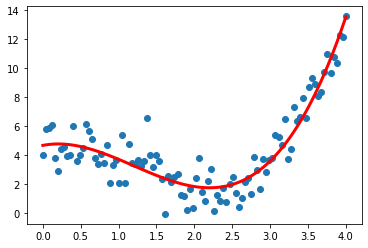

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
x = np.linspace(0,4,100).reshape((100,1))
y = x**2 + 5*np.cos(x) + np.random.randn(100,1)
x_poly = PolynomialFeatures(3).fit_transform(x)
model = LinearRegression().fit(x_poly,y)
model.score(x_poly,y)
y_pred = model.predict(x_poly)
plt.scatter(x,y)
plt.plot(x,y_pred,c='r',lw=3)

In [15]:
def pred(model,x):
    r = np.array([x]).reshape(1,1)
    r = PolynomialFeatures(3).fit_transform(r)
    print(model.predict(r))

# Pipeline

In [47]:
## Exemple de test sans pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
# Data
xp = iris.data
yp = iris.target
xtrain , xtest , ytrain , ytest = train_test_split(xp,yp,test_size=0.2)

## Transformation
standard = StandardScaler()
xtransform = standard.fit_transform(xtrain)

## Estimateur 
model = SGDClassifier(random_state=0)
model.fit(xtransform,ytrain)
model.score(xtransform,ytrain)

## Test
xtestt = standard.transform(xtest)
model.predict(xtestt)

array([2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0,
       0, 0, 1, 0, 1, 0, 1, 0])

In [48]:
## Avec pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
pipeline = make_pipeline(StandardScaler(),SGDClassifier())
pipeline.fit(xtrain,ytrain)
pipeline.score(xtrain,ytrain)
pipeline.predict(xtest)

## ou avec GRidsearchCv
pip = make_pipeline(PolynomialFeatures(),
                    MinMaxScaler(),
                   SGDClassifier(random_state=0))

parm = {
    'polynomialfeatures__degree':[2,3,4,5,6,7,8,9],
    'sgdclassifier__penalty':['l1','l2']
}
grid = GridSearchCV(pip,parm,cv=4)
grid.fit(xtrain,ytrain)
grid.score(xtest,ytest)
#confusion_matrix(ytest,grid.predict(xtest))

0.9666666666666667

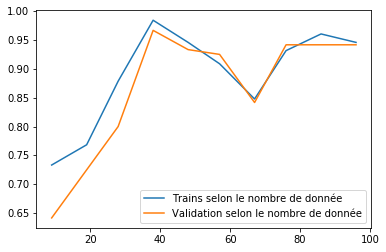

In [49]:
## MAintenant voir si avec plus de données ça va aller
from sklearn.model_selection import learning_curve

N , trains , vals = learning_curve(pip,xtrain,ytrain,train_sizes=np.linspace(0.1,1.0,10),cv=5)
plt.plot(N,trains.mean(axis=1),label='Trains selon le nombre de donnée')
plt.plot(N,vals.mean(axis=1),label='Validation selon le nombre de donnée')
plt.legend()

### Exo de pipeline avec un dataset plus complexe

In [22]:
## Pour un dataset héterogène
## Trier les données en numerique et categoriales
## Definir pour chacque type de variable une pipeline
## Injecter ces pipelines dans la make_column_transformer qui retourne un transformer final qu'on peut entrainer
## Appliquer le transformer dans notre pipeline final pour entrainer le modèle

In [61]:
## Go
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

## Dataset
titanic = pd.read_csv('seaborn-data/titanic.csv')
titanic.head()
X = titanic.drop('survived',axis=1)
y = titanic['survived']
# Tri 
numt = ['age','pclass','fare']
numerical_features = make_column_selector(dtype_include=np.number)
categorial_features = make_column_selector(dtype_exclude=np.number)

# pipeline pour chacque tri
num_pipeline = make_pipeline(SimpleImputer(),StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())

# Transformation
preprocessor = make_column_transformer((num_pipeline,numerical_features),
                                      (cat_pipeline,categorial_features))


# Application
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)
final = make_pipeline(preprocessor,KNeighborsClassifier())
params = {'kneighborsclassifier__n_neighbors':np.arange(1,20),
             'kneighborsclassifier__metric':['euclidean','manhattan']
}

g = GridSearchCV(final,params,cv=5)
g.fit(xtrain,ytrain)
g.score(xtest,ytest)

0.9720670391061452

In [63]:
numt

['age', 'pclass', 'fare']